In [1]:
import numpy as np
import pandas as pd
from os.path import join, dirname, isfile, basename
from os import getcwd, listdir
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
if 'jupyterthemes' in sys.modules:
    from jupyterthemes import jtplot
    jtplot.style()

In [3]:
oil = pd.read_csv('ooip.csv')
oil

,easting,northing,OOIP
0,1100.0,400.000000,2.673385
1,1100.0,504.678170,2.673385
2,1100.0,609.356341,2.673385
3,1100.0,714.034511,2.673385
4,1100.0,818.712681,2.673385
...,...,...,...
889244,95300.0,98588.123747,2.118020
889245,95300.0,98692.801918,2.118020
889246,95300.0,98797.480088,2.118020
889247,95300.0,98902.158258,2.118020


In [141]:
x = oil['easting'].to_numpy()
y = oil['northing'].to_numpy()
oil_in_place = oil['OOIP'].to_numpy()

In [16]:
well_length = 5280
ooip = oil_in_place.reshape(np.unique(x).shape[0], np.unique(y).shape[0])

In [37]:
x[ooip.shape[0]-1]

1100.0

In [148]:
min(np.unique(x))

1100.0

In [81]:
from tqdm.notebook import tqdm
num_wells = 10
best_locs = []
best_vals = []
northings = np.unique(y)
eastings = np.unique(x)
east_step = eastings[1] - eastings[0]
iter_steps = int(well_length // east_step)
well_bar= tqdm(total=num_wells * 10)
north_bar = tqdm(total=northings.shape[0])
east_bar = tqdm(total=eastings.shape[0])
for a in range(num_wells):
    found_val = -1
    found_loc = (-1, -1)
    north_bar.reset()
    for i in range(northings.shape[0]):
        northing = northings[i]
        east_iter = iter(eastings)
        east_bar.reset()
        for easting in east_iter:
            easting = eastings[j]
            loc = (easting, northing)
            if loc in best_locs:
                next_easting = easting
                while next_easting is not None and next_easting < easting + well_length:
                    next_easting = next(east_iter, None)
                    if next_easting is not None:
                        east_bar.update(1)
            else:
                val = oil.loc[(oil['easting'] >= easting) & 
                               (oil['easting'] <= easting+well_length) &
                              (oil['northing'] == northing)]['OOIP'].values.sum()
                
                if val > found_val:
                    found_val = val
                    found_loc = loc
                east_bar.update(1)
        north_bar.update(1)
    
    best_locs.append(found_loc)
    best_vals.append(found_val)
    well_bar.update(10)



In [82]:
best_locs

[(4700.0, 400.0),
 (4700.0, 504.6781703061863),
 (4700.0, 609.3563406123726),
 (4700.0, 714.0345109185588),
 (4700.0, 818.7126812247452),
 (4700.0, 923.3908515309315),
 (4700.0, 1028.0690218371178),
 (4700.0, 1132.747192143304),
 (4700.0, 1237.4253624494904),
 (4700.0, 1342.1035327556767)]

In [138]:
c = oil['OOIP'].to_numpy()
c = c / (1.4 * np.amax(c))

for location in best_locs:
    indices = oil.loc[(oil['easting'] >= location[0]) & (oil['easting'] <= location[0] + well_length) &
                (oil['northing'] == location[1])].index
    for i in indices:
        c[i] = 1
    

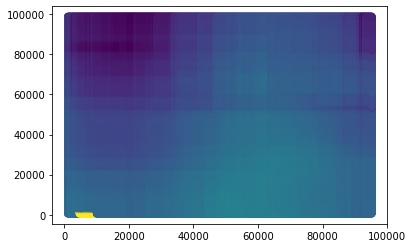

In [143]:
plt.scatter(x, y, c=c)

In [115]:
oil.loc[(oil['easting'] == best_locs[0][0]) & (oil['northing']==best_locs[0][1])].index

,easting,northing,OOIP
33948,4700.0,400.0,2.650889


In [107]:
oil['northing']==best_locs[0][1]

0          True
1         False
2         False
3         False
4         False
          ...  
889244    False
889245    False
889246    False
889247    False
889248    False
Name: northing, Length: 889249, dtype: bool

82993